In [216]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [217]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [218]:

%%time
data_root = os.path.join("/", "mnt", "hgfs", "Temp", "data", "job_september", "base")
smartbuoy_path =os.path.join(data_root, "smartbuoy") 


CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 28.1 µs


In [219]:

smartbuoy_loc = gpd.read_file(os.path.join(smartbuoy_path, 'SmartBuoy_Locations', 'Smart_Buoy_Locations.shp'))
smartbuoy_data = pd.read_csv(os.path.join(smartbuoy_path, 'SmartBuoy_Data', 'dowsing-smartbuoy.csv'), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) #encoding = "utf-8")


In [220]:
smartbuoy_data

,Time (GMT),Temperature (°C) at 1 m,Salinity (PSS78) at 1 m,Turbidity (SP) (FTU) at 1 m,Fluorescence (MT) (arb. unit) at 1 m,Fluorescence (SP) (arb. unit) at 1 m,PAR irradiance (µE m-2 s-1) at 0 m,PAR irradiance (µE m-2 s-1) at 1 m,Oxygen percent saturation (%) at 1 m,Nitrate (µmol/l) at 1 m,Fluorescence (TS) (arb. unit) at 1 m
0,2009-01-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-10 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-10 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-10 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-10 14:00:00,5.89,34.62,2.11,NaN,0.24,NaN,102.0,98.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176878,2019-05-17 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176879,2019-05-17 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176880,2019-05-17 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176881,2019-05-17 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0 Time (GMT)
1 Temperature (°C) at 1 m
2 Salinity (PSS78) at 1 m
3 Turbidity (SP) (FTU) at 1 m
4 Fluorescence (MT) (arb. unit) at 1 m
5 Fluorescence (SP) (arb. unit) at 1 m
6 PAR irradiance (µE m-2 s-1) at 0 m
7 PAR irradiance (µE m-2 s-1) at 1 m
8 Oxygen percent saturation (%) at 1 m
9 Nitrate (µmol/l) at 1 m
10 Fluorescence (TS) (arb. unit) at 1 m


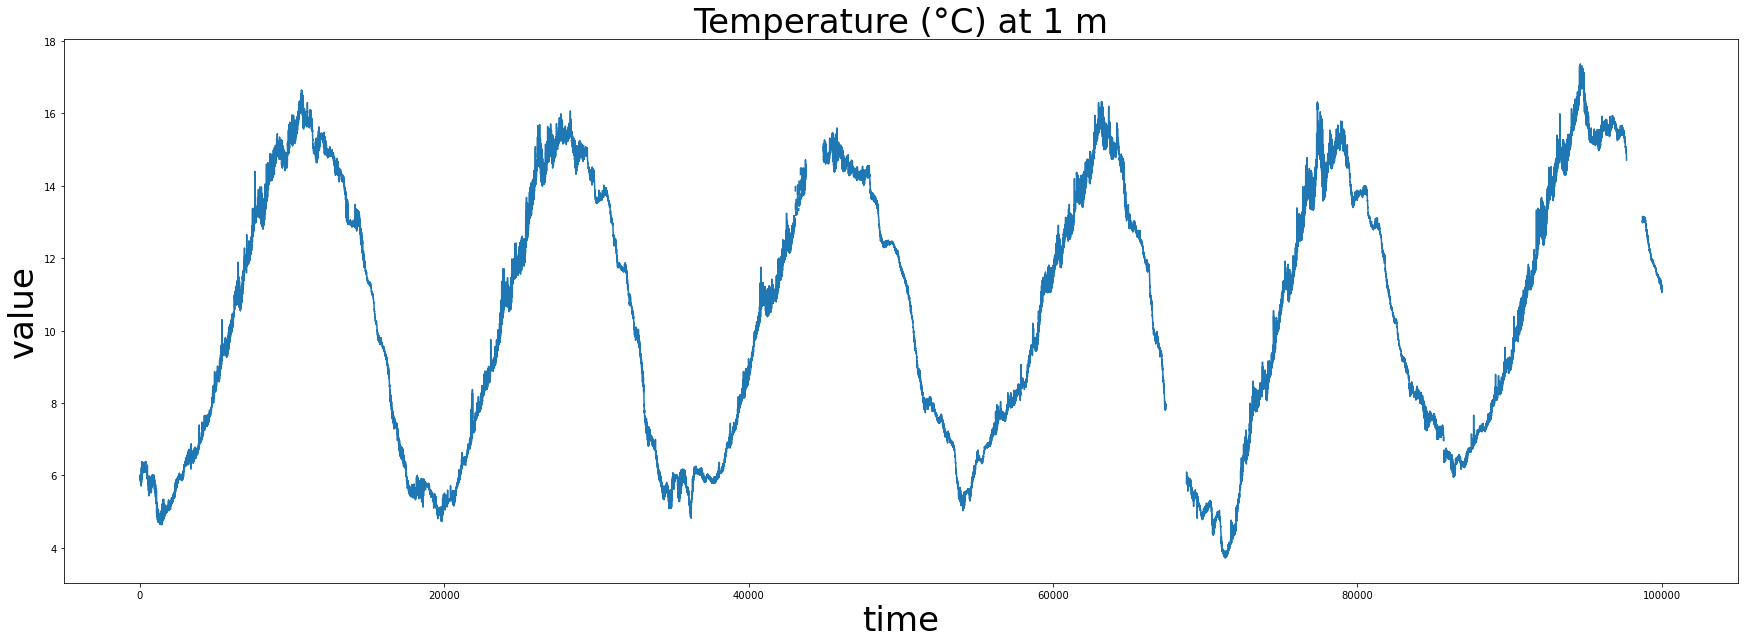

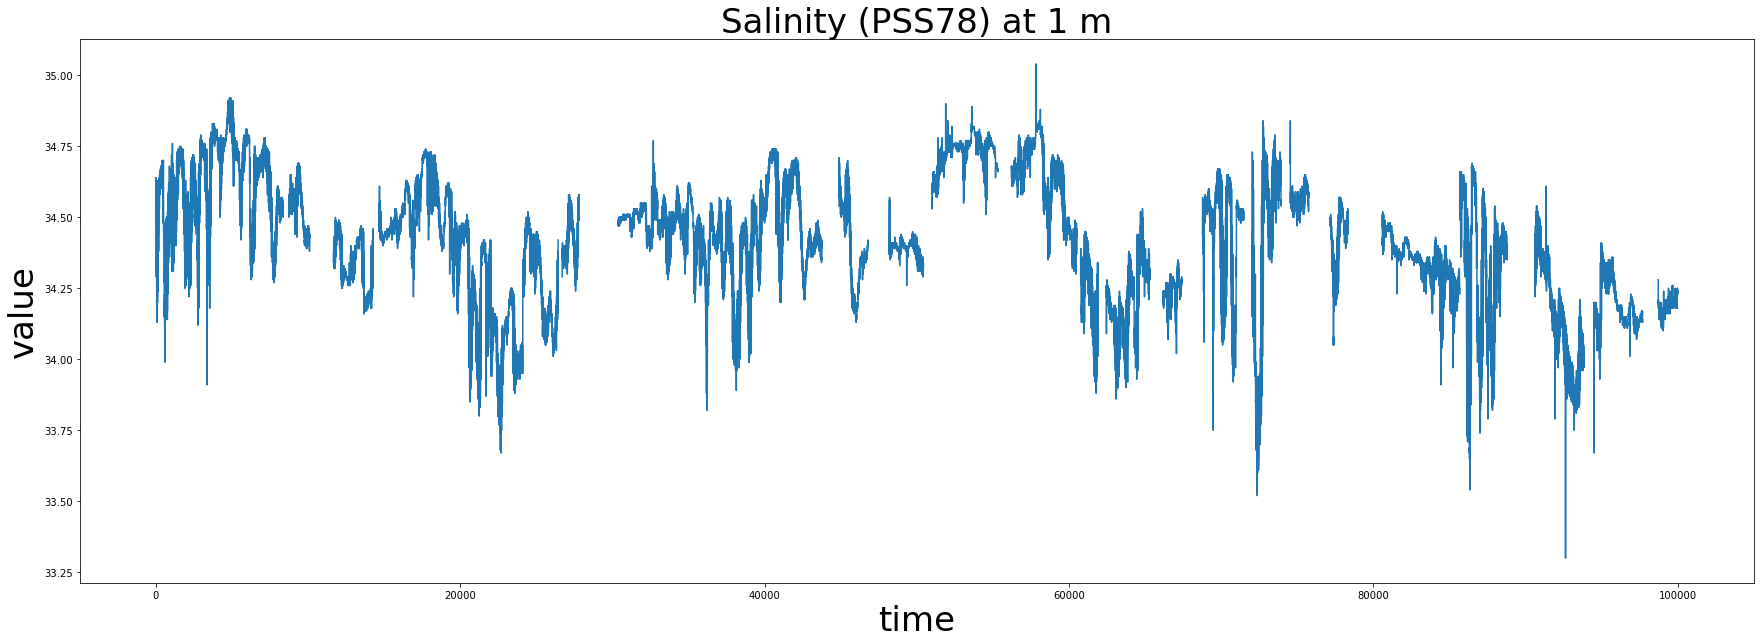

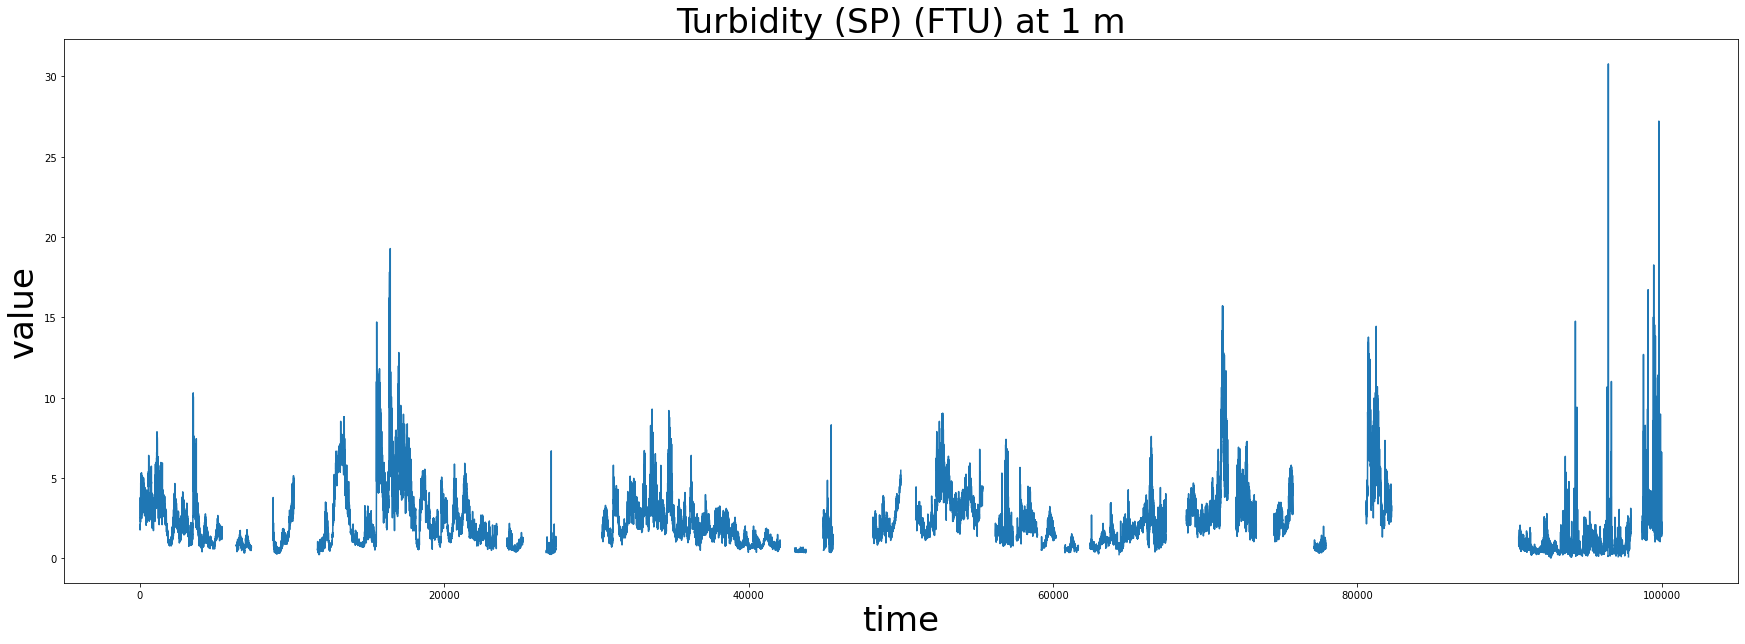

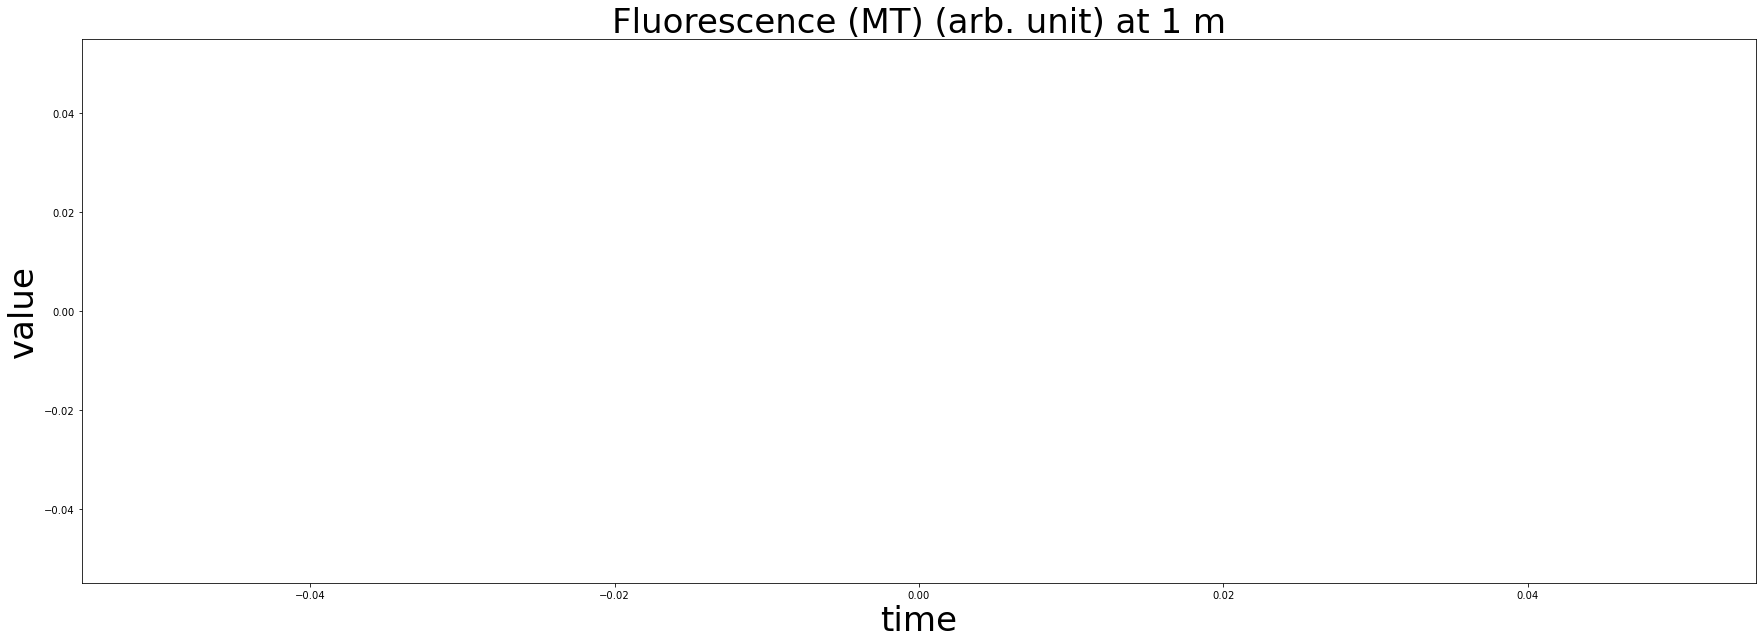

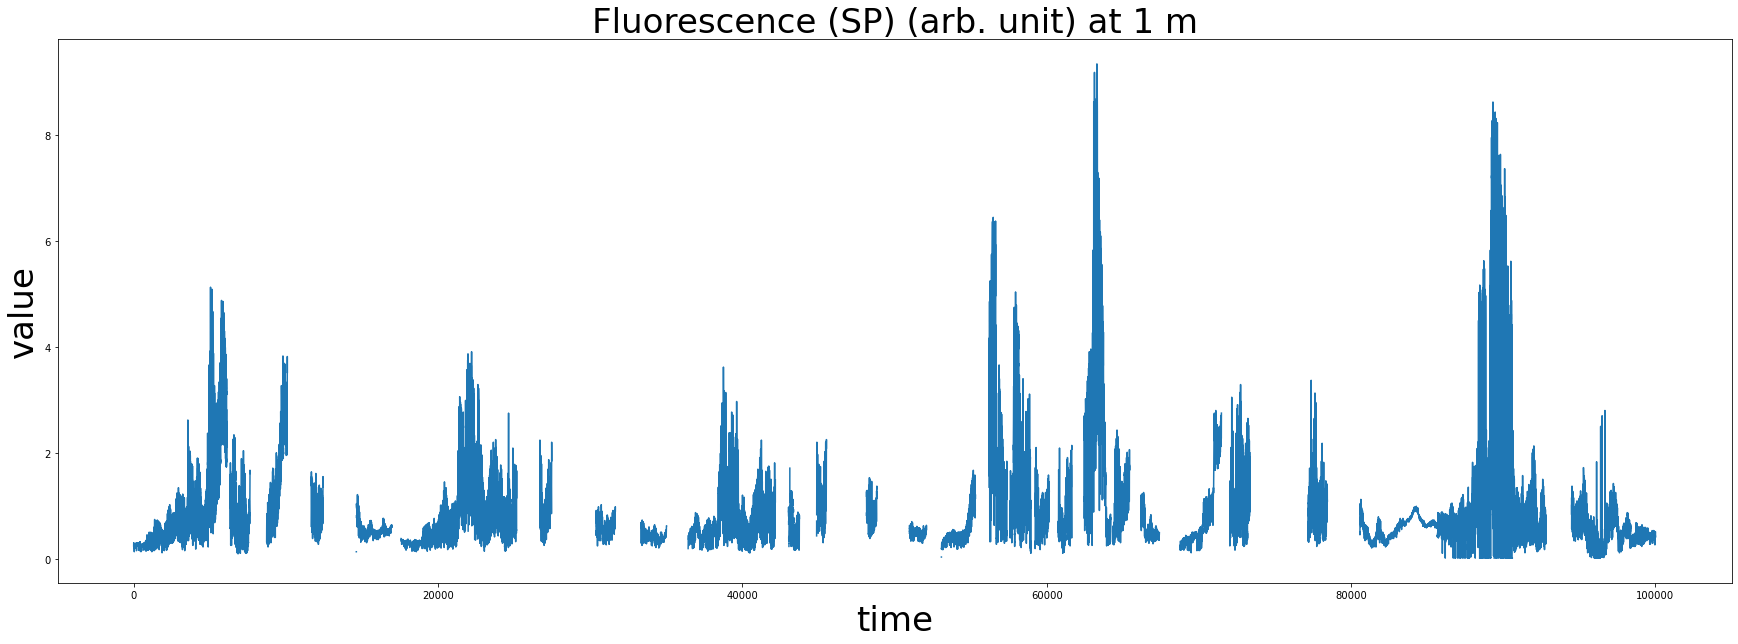

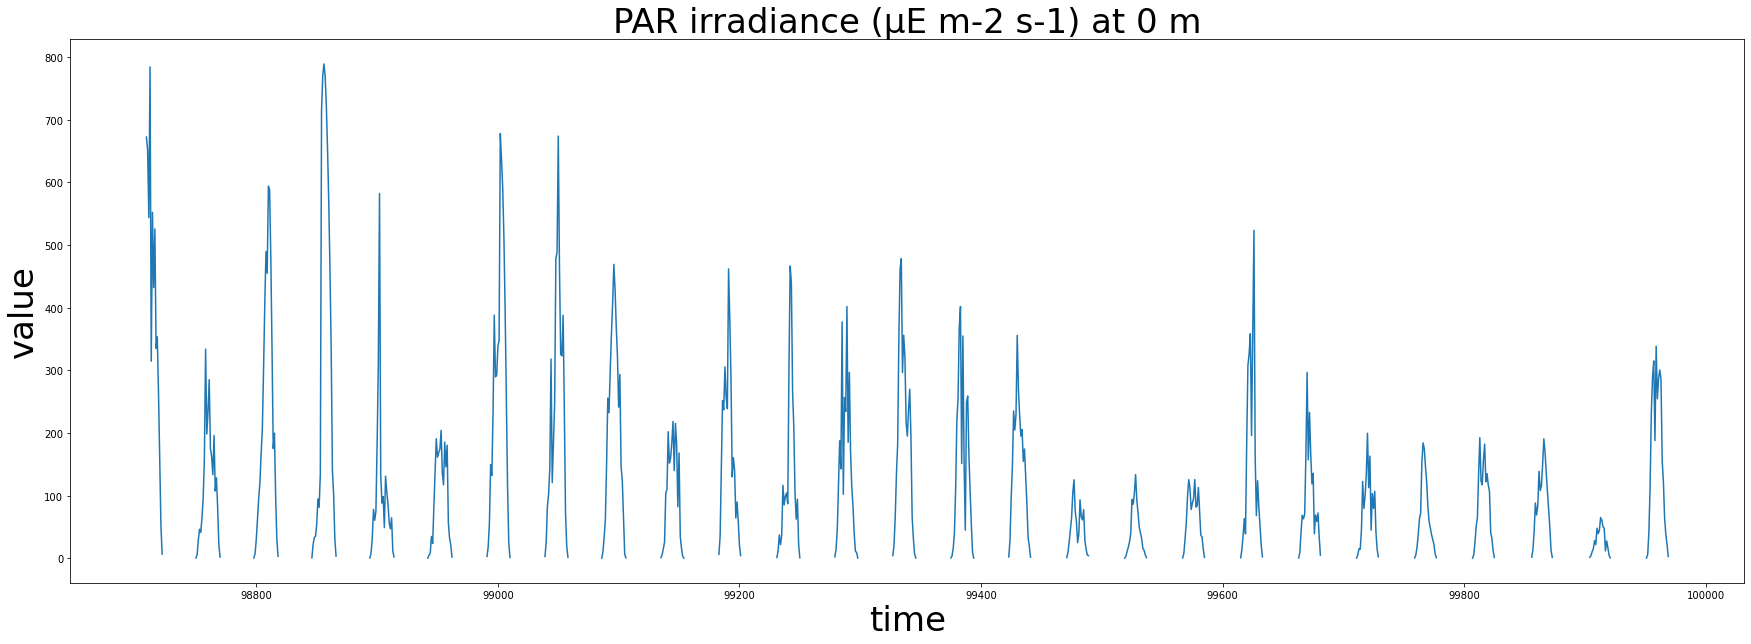

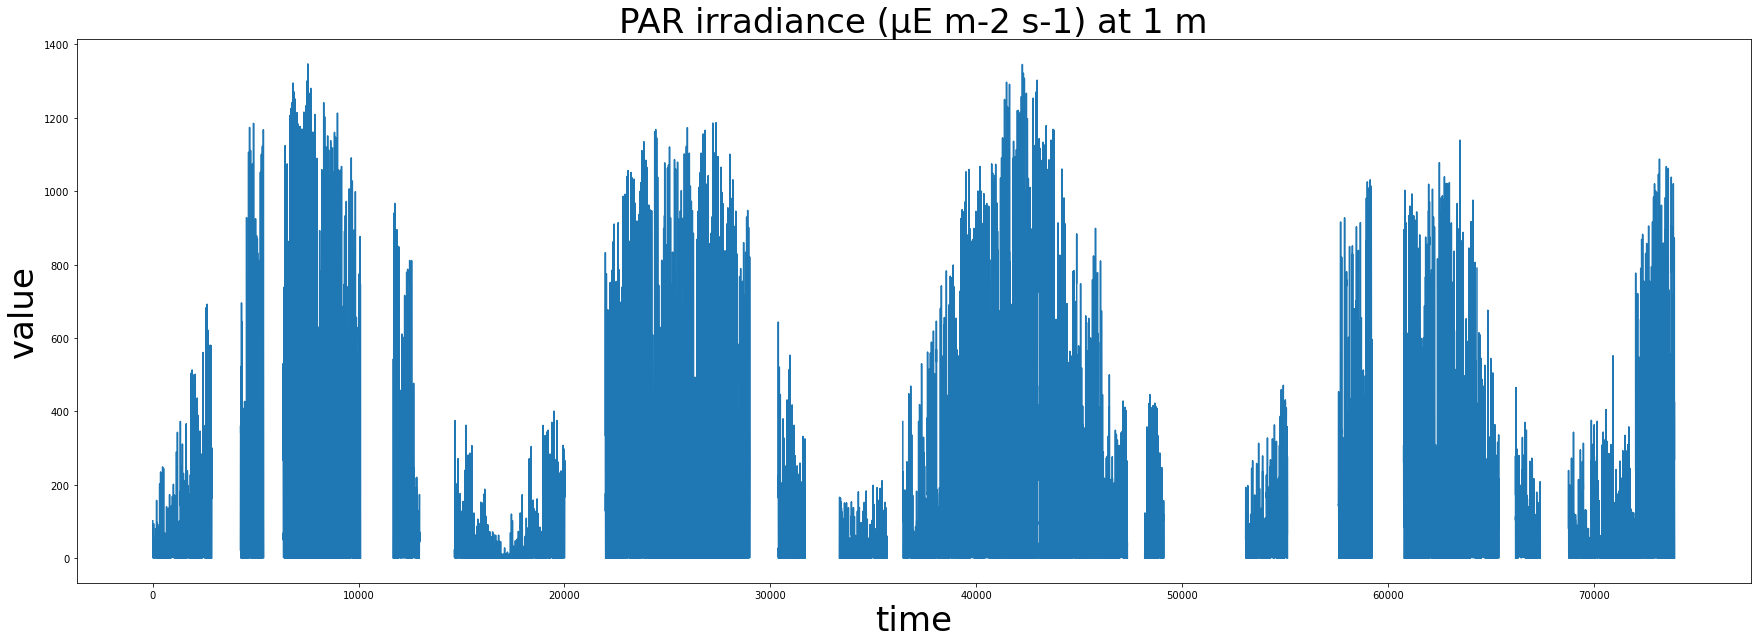

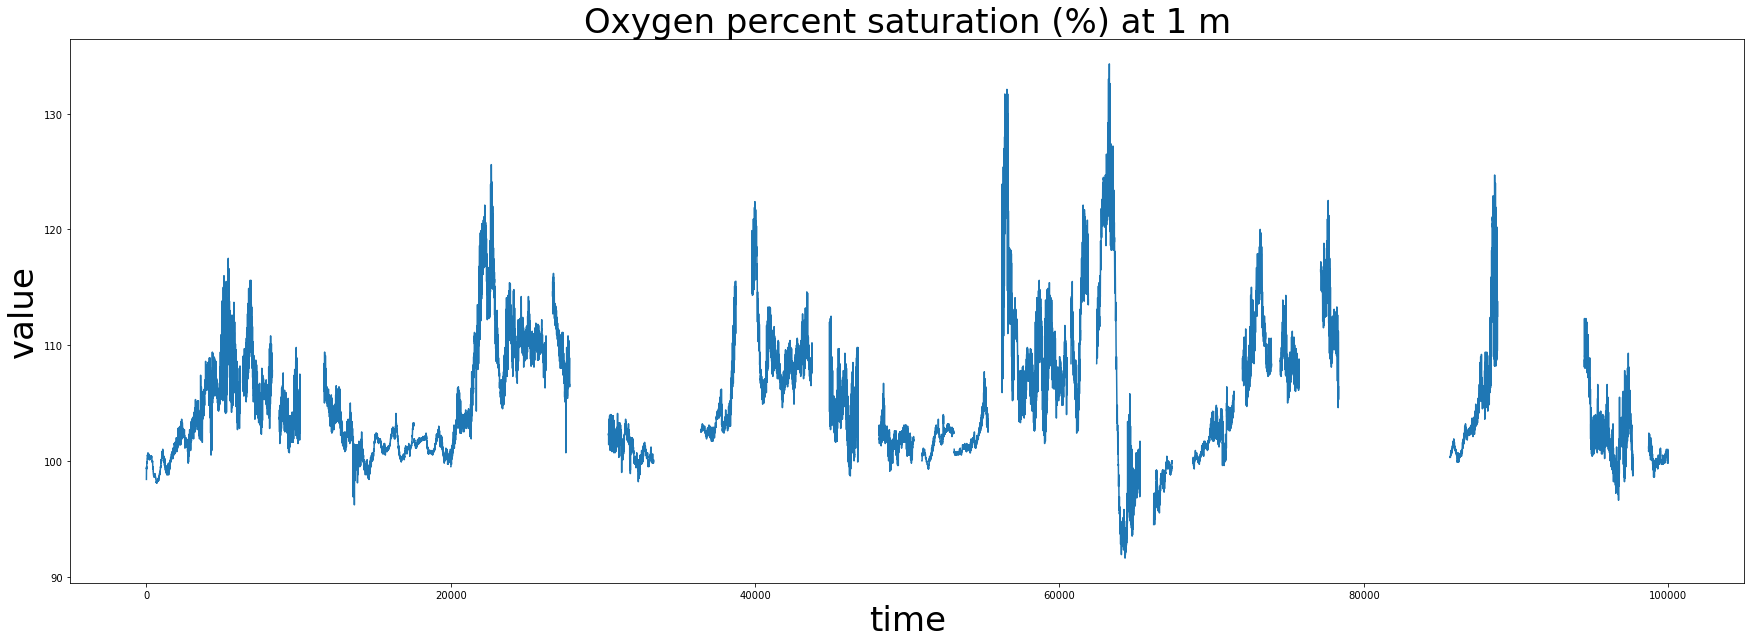

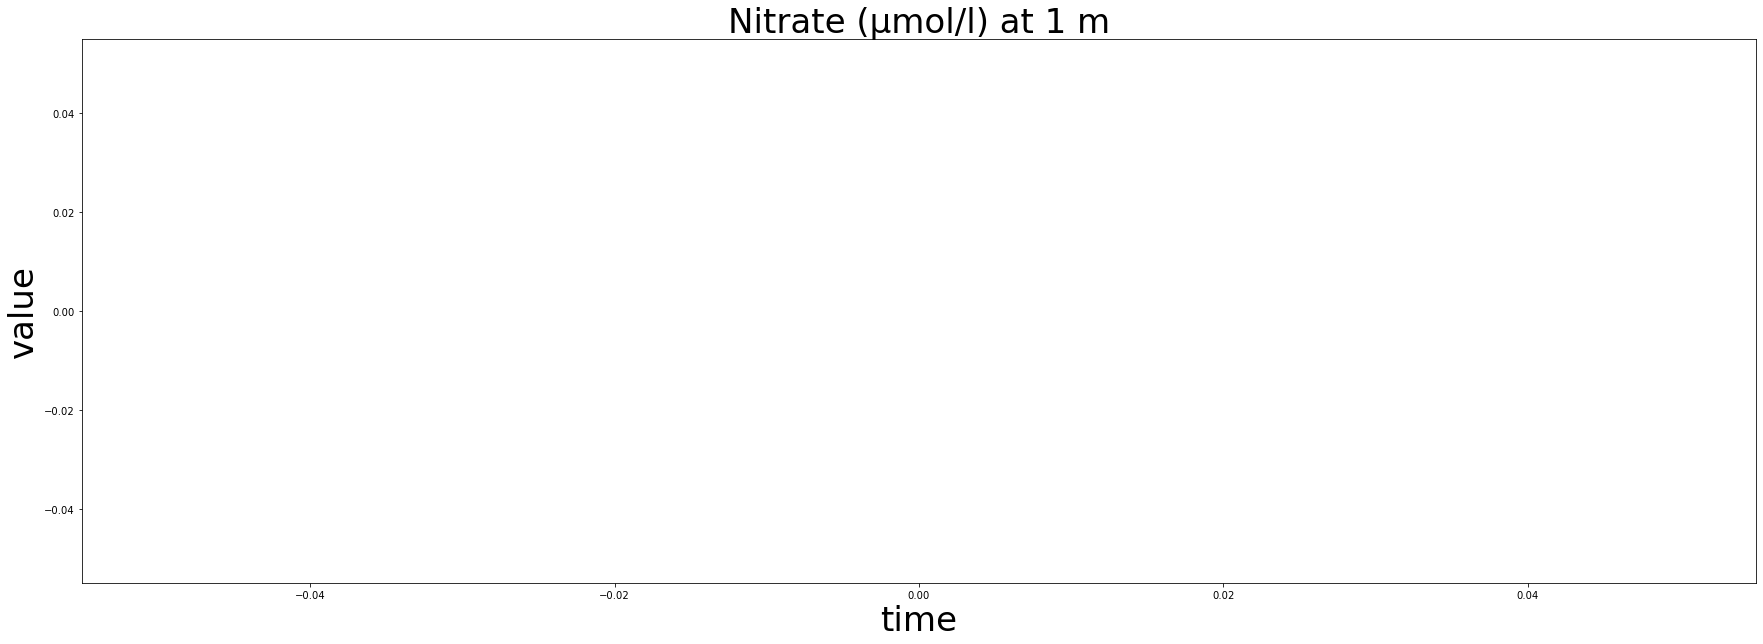

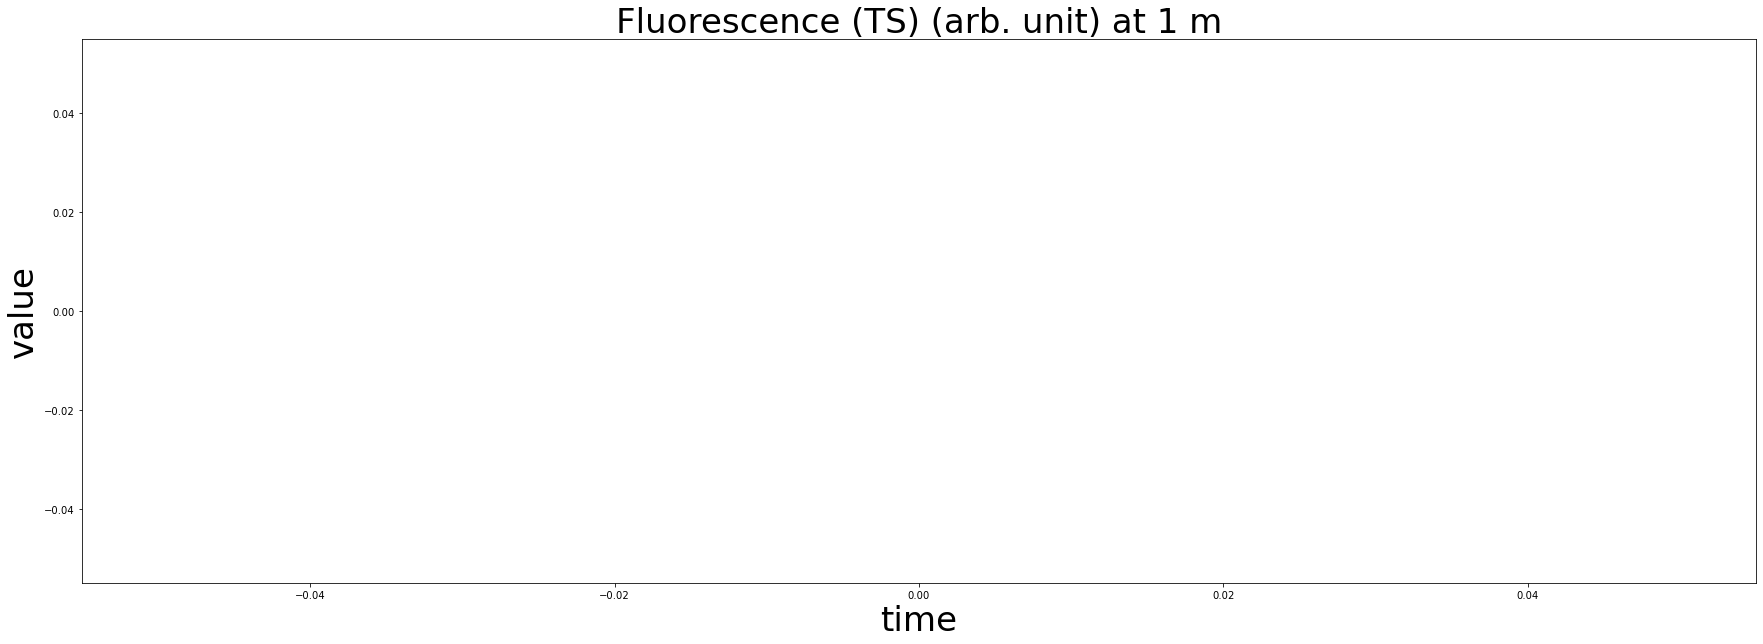

In [221]:
for ind, column in enumerate(smartbuoy_data.columns):
    print(ind, column)
    if ind != 0:
        fig, ax = plt.subplots(figsize=(30, 10))
        smartbuoy_data[column].head(100000).plot(ax=ax)
        ax.set_xlabel('time',  fontsize=34)
        ax.set_ylabel('value',  fontsize=34)
        ax.set_title(column, fontsize=34)
        

In [181]:
file_list = os.listdir(os.path.join(smartbuoy_path, 'SmartBuoy_Data'))
first = True
for file in file_list:
    print(file)
    if file != 'dowsing-smartbuoy.csv':
        temp_data = pd.read_csv(os.path.join(smartbuoy_path, 'SmartBuoy_Data', file), 
                                   encoding = "ISO-8859-1", engine='python', index_col = False) 
        #temp_data['name'] = file[:-4]
        if first == True:
            training_data = temp_data
            first = False
        else:
            training_data =  training_data.append(temp_data)
    else:
        testing_data = pd.read_csv(os.path.join(smartbuoy_path, 'SmartBuoy_Data', file), 
                                encoding = "ISO-8859-1", engine='python', index_col = False) 
        #testing_data['name'] = file[:-4]

celtic-deep-smartbuoy.csv
celtic-deep-smartbuoy-site-2.csv
noordwijk-5-smartbuoy.csv
gabbard-nmmp-smartbuoy.csv
oyster-ground-smartbuoy.csv
warp-(th1)-nmmp-smartbuoy.csv
west-gabbard-smartbuoy.csv
dowsing-smartbuoy.csv
west-gabbard-2-smartbuoy.csv
noordwijk-2-smartbuoy.csv
liverpool-bay-coastal-observatory.csv
candyfloss-nerc-ssb-smartbuoy.csv
north-dogger-smartbuoy-for-e3205.csv


In [182]:
print(testing_data.shape, training_data.shape)

(176883, 11) (1269825, 11)


In [183]:
testing_data[["Time (GMT)"]] = testing_data[["Time (GMT)"]].apply(pd.to_datetime)
testing_data = testing_data.set_index('Time (GMT)')
testing_data = testing_data.sort_index()
testing_data['dayofyear'] = testing_data.index.dayofyear 
testing_data['hour'] = testing_data.index.hour


In [184]:
testing_data = testing_data.drop(columns=['Fluorescence (TS) (arb. unit) at 1 m', 
                                          'Nitrate (µmol/l) at 1 m', 'Fluorescence (MT) (arb. unit) at 1 m',
                                         'PAR irradiance (µE m-2 s-1) at 0 m'])


In [185]:
print(len(testing_data.index))
testing_data = testing_data.dropna()
print(len(testing_data.index))

176883
25719


In [186]:
training_data[["Time (GMT)"]] = training_data[["Time (GMT)"]].apply(pd.to_datetime)
training_data = training_data.set_index('Time (GMT)')
training_data = training_data.sort_index()
training_data['dayofyear'] = training_data.index.dayofyear 
training_data['hour'] = training_data.index.hour

In [187]:
training_data = training_data.drop(columns=['Fluorescence (TS) (arb. unit) at 1 m', 
                                          'Nitrate (µmol/l) at 1 m', 'Fluorescence (MT) (arb. unit) at 1 m',
                                         'PAR irradiance (µE m-2 s-1) at 0 m'])


In [188]:
print(len(training_data.index))
training_data = training_data.dropna()
print(len(training_data.index))

1269825
132954


In [189]:
print(training_data.shape, testing_data.shape)

(132954, 8) (25719, 8)


In [190]:

import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [191]:
y_train = training_data['Salinity (PSS78) at 1 m'].to_numpy(copy=True, dtype=str)
y_test = testing_data['Salinity (PSS78) at 1 m'].to_numpy(copy=True, dtype=str)


In [192]:
training_data = training_data.drop(columns=['Salinity (PSS78) at 1 m'])
ploting_data = pd.DataFrame(testing_data['Salinity (PSS78) at 1 m'])
testing_data = testing_data.drop(columns=['Salinity (PSS78) at 1 m'])

In [193]:
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [194]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132954, 7) (25719, 7) (132954,) (25719,)


In [195]:
n=100002
print(X_train[n], y_train[n])

[1.477e+01 4.930e+00 7.300e-01 2.000e-01 9.830e+01 2.970e+02 1.900e+01] 35.15


In [196]:
reg = RandomForestRegressor()

In [197]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [198]:
preds = reg.predict(X_test)


In [199]:
mse = mean_squared_error(y_test, preds)

/home/ubuntu/anaconda3/envs/job/lib/python3.7/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [200]:
y_test

array(['34.62', '34.57', '34.62', ..., '34.54', '34.52', '34.51'],
      dtype='<U32')

In [201]:
preds

array([32.3436, 32.2988, 32.3154, ..., 32.2049, 32.6121, 32.6147])

In [202]:
mse

2.7129923464841417

In [204]:
testing_data['predictions'] = preds

In [205]:
y_test

array(['34.62', '34.57', '34.62', ..., '34.54', '34.52', '34.51'],
      dtype='<U32')

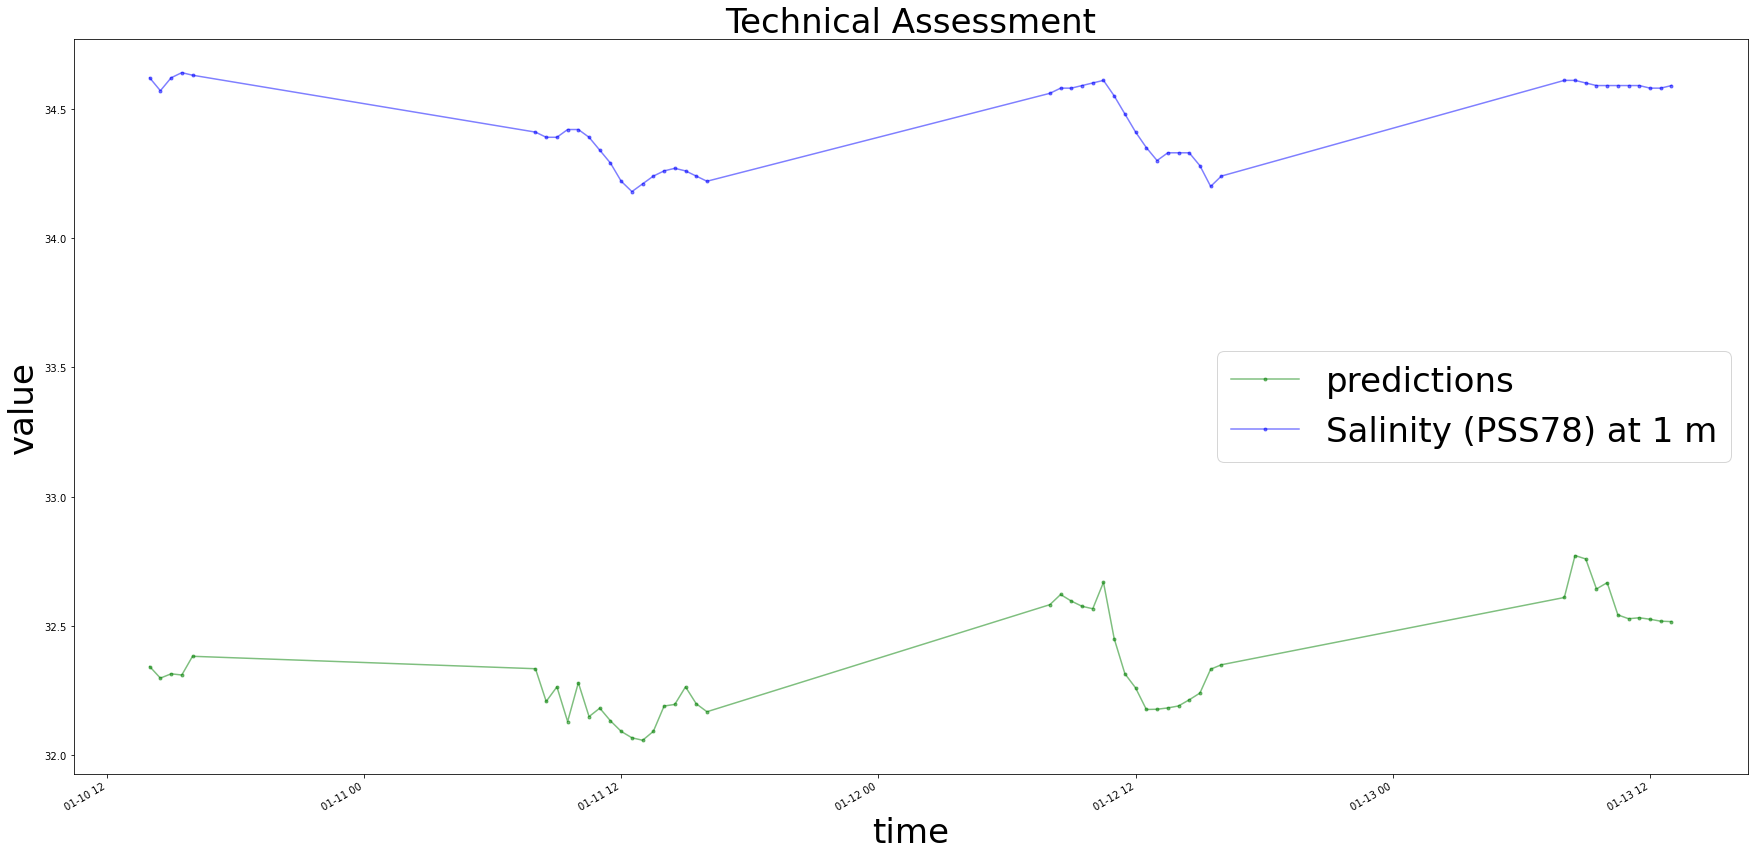

In [215]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['Salinity (PSS78) at 1 m'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('time',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)

In [99]:
fig, ax = plt.subplots(figsize=(12, 12))
coastline.plot(ax=ax, alpha=0.1, color='grey')
ports_repr.plot(ax=ax, alpha=0.5, color='green')
smart_buoys.plot(ax=ax, alpha=0.7, color='blue')
wave_net.plot(ax=ax, alpha=0.7, color='red')
ax.legend(['SmartBuoy','WaveNet','Port Limits'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Technical Assessment')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [222]:
testing_data['predictions'].head(50)

Time (GMT)
2009-01-10 14:00:00    32.3436
2009-01-10 14:30:00    32.2988
2009-01-10 15:00:00    32.3154
2009-01-10 15:30:00    32.3108
2009-01-10 16:00:00    32.3832
2009-01-11 08:00:00    32.3351
2009-01-11 08:30:00    32.2086
2009-01-11 09:00:00    32.2650
2009-01-11 09:30:00    32.1308
2009-01-11 10:00:00    32.2810
2009-01-11 10:30:00    32.1500
2009-01-11 11:00:00    32.1826
2009-01-11 11:30:00    32.1334
2009-01-11 12:00:00    32.0927
2009-01-11 12:30:00    32.0680
2009-01-11 13:00:00    32.0585
2009-01-11 13:30:00    32.0930
2009-01-11 14:00:00    32.1908
2009-01-11 14:30:00    32.1971
2009-01-11 15:00:00    32.2650
2009-01-11 15:30:00    32.1996
2009-01-11 16:00:00    32.1688
2009-01-12 08:00:00    32.5828
2009-01-12 08:30:00    32.6221
2009-01-12 09:00:00    32.5966
2009-01-12 09:30:00    32.5765
2009-01-12 10:00:00    32.5670
2009-01-12 10:30:00    32.6693
2009-01-12 11:00:00    32.4514
2009-01-12 11:30:00    32.3155
2009-01-12 12:00:00    32.2607
2009-01-12 12:30:00    32.17

In [ ]:
# next steps pdp